In [219]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
# Setting the current working directory
import os; os.chdir('/content/drive/MyDrive/AI_ML/Projects/Capstone-NLP')

### Importing the Packages

In [221]:
import plotly
print(plotly.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, gc
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')

from wordcloud import WordCloud, STOPWORDS

random_state = 42
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

4.4.1


Loadind Data

In [222]:
data = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
data.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Renaming Column Names to Appropiate Names

In [223]:
data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [224]:
data.drop("Unnamed: 0", axis=1, inplace=True)

data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
data.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Looking at the data types

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [226]:
columns = data[data.columns[~data.columns.isin(['Description', 'Unnamed: 0', 'Data'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\nUnique count per label is:\n{data[cols].value_counts()}\n')

Unique values for Date is 
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 

In [227]:
replace_values = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(replace_values)
replace_values = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5}
data['Accident Level'] = data['Accident Level'].map(replace_values)
replace_values = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_values)
del replace_values

In [228]:
print(f'Dataset after adjusting categorical values\n')
data.head()

Dataset after adjusting categorical values



,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Checking for Null Values

In [229]:
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [230]:
data.shape

(425, 10)

Preparing the data

In [231]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x : x.day)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data['WeekofYear'] = data['Date'].apply(lambda x : x.weekofyear)
data.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


In [232]:
data.shape

(425, 15)

In [233]:
data.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description', 'Year', 'Month', 'Day', 'Weekday', 'WeekofYear'],
      dtype='object')

In [234]:
def month_quarter_Conversion(x):
    if x in [10, 11, 12]:
        season = 'Fourth'
    elif x in [1, 2, 3]:
        season = 'First'
    elif x in [4, 5, 6]:
        season = 'Second'
    elif x in [7, 8, 9]:
        season = 'Third'
    return season
data['Quarter'] = data['Month'].apply(month_quarter_Conversion)

data.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Quarter
0,2016-01-01,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,First
1,2016-01-02,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,First
2,2016-01-06,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,First
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,First
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,First


In [235]:
data.Date.max()

Timestamp('2017-07-09 00:00:00')

In [236]:
data.Date.min()

Timestamp('2016-01-01 00:00:00')

In [237]:
data_trend=data.pivot_table(index='Month', columns=[ 'Year','Accident Level'], aggfunc='count')['Country']

In [238]:
data_trend

Year            2016                      2017                    
Accident Level     0    1    3    4    5     0    1    3    4    5
Month                                                             
1               11.0  NaN  NaN  1.0  NaN  22.0  2.0  2.0  1.0  1.0
2               23.0  4.0  2.0  1.0  1.0  19.0  5.0  2.0  4.0  NaN
3               24.0  4.0  3.0  3.0  NaN  13.0  3.0  NaN  NaN  3.0
4               24.0  1.0  3.0  1.0  NaN  20.0  1.0  NaN  2.0  NaN
5               23.0  2.0  NaN  1.0  NaN   9.0  1.0  1.0  3.0  1.0
6               26.0  1.0  NaN  3.0  1.0  15.0  2.0  2.0  1.0  NaN
7               11.0  1.0  4.0  2.0  1.0   5.0  NaN  NaN  NaN  NaN
8               15.0  3.0  2.0  1.0  NaN   NaN  NaN  NaN  NaN  NaN
9               18.0  3.0  2.0  1.0  NaN   NaN  NaN  NaN  NaN  NaN
10              11.0  4.0  4.0  2.0  NaN   NaN  NaN  NaN  NaN  NaN
11               9.0  1.0  1.0  2.0  NaN   NaN  NaN  NaN  NaN  NaN
12              18.0  2.0  3.0  1.0  NaN   NaN  NaN  NaN  NaN  NaN

In [239]:
n=np.nan
data_trend.replace(n,0,inplace=True)

In [240]:
data_trend

Year            2016                      2017                    
Accident Level     0    1    3    4    5     0    1    3    4    5
Month                                                             
1               11.0  0.0  0.0  1.0  0.0  22.0  2.0  2.0  1.0  1.0
2               23.0  4.0  2.0  1.0  1.0  19.0  5.0  2.0  4.0  0.0
3               24.0  4.0  3.0  3.0  0.0  13.0  3.0  0.0  0.0  3.0
4               24.0  1.0  3.0  1.0  0.0  20.0  1.0  0.0  2.0  0.0
5               23.0  2.0  0.0  1.0  0.0   9.0  1.0  1.0  3.0  1.0
6               26.0  1.0  0.0  3.0  1.0  15.0  2.0  2.0  1.0  0.0
7               11.0  1.0  4.0  2.0  1.0   5.0  0.0  0.0  0.0  0.0
8               15.0  3.0  2.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0
9               18.0  3.0  2.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0
10              11.0  4.0  4.0  2.0  0.0   0.0  0.0  0.0  0.0  0.0
11               9.0  1.0  1.0  2.0  0.0   0.0  0.0  0.0  0.0  0.0
12              18.0  2.0  3.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0

In [241]:
data_trend[2016]

Accident Level,0,1,3,4,5
Month,,,,,
1,11.0,0.0,0.0,1.0,0.0
2,23.0,4.0,2.0,1.0,1.0
3,24.0,4.0,3.0,3.0,0.0
4,24.0,1.0,3.0,1.0,0.0
5,23.0,2.0,0.0,1.0,0.0
6,26.0,1.0,0.0,3.0,1.0
7,11.0,1.0,4.0,2.0,1.0
8,15.0,3.0,2.0,1.0,0.0
9,18.0,3.0,2.0,1.0,0.0


In [242]:
month_order={
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    '10':10,
    '11':11,
    '12':12
}

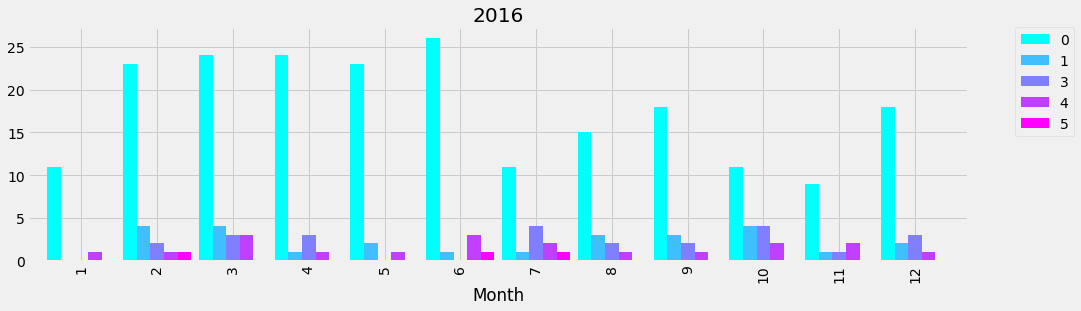

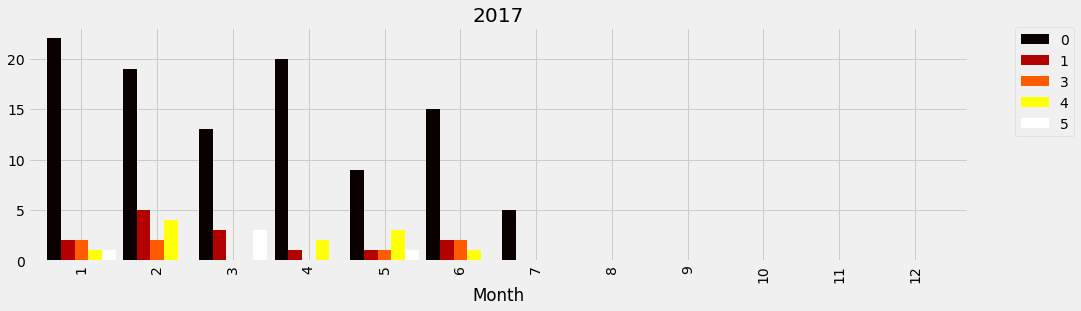

In [243]:
data_trend[2016].plot(kind='bar', figsize=(15,4), width=0.9, cmap='cool', title='2016')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
data_trend[2017].plot(kind='bar', figsize=(15,4), width=0.9, cmap='hot', title='2017')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


- The accidents with the level I are most common. These could be due to small negligences, like forgetting to wear PPE, or dropping a tool, etc.
- Observing 2016 data, there are more number of incidents in the first half of the year than in the second half of the year. 
- The overview for this dataset mentioned that this data is from manufacturing plants in South America, so the first half of the year is cold and the second is warmer. So the number of incidents is higher in colder months.

Univariate Analysis

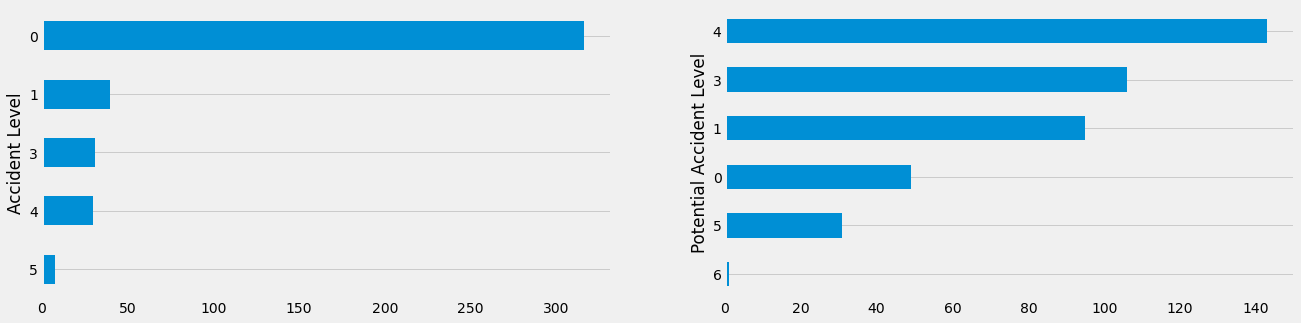

In [244]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
data[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
data[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')

The Country that is most effected

In [245]:
fig = px.pie(data, names='Country', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

Affected sector

In [246]:
fig = px.pie(data, names='Industry Sector', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

Mostly affected Employee Type

In [247]:
fig = px.pie(data, names='Employee type', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

Mostly Affected Quater

In [248]:
fig = px.pie(data, names='Quarter', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()


Mostly affected local

In [249]:
fig = px.pie(data, names='Local', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

Now let's take a look at the critical risk category. This column contains information on the type of incident.

In [250]:
data_cr=data.pivot_table(index='Critical Risk', columns='Accident Level', aggfunc='count')['Month']
data_cr.replace(n, 0, inplace=True)
data_cr['total']=data_cr.sum(axis=1)

In [251]:
data_cr.style.background_gradient(cmap='Blues')

Accident Level,0,1,3,4,5,total
Critical Risk,,,,,,
Not applicable,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Bees,10.000000,0.000000,0.000000,0.000000,0.000000,10.000000
Blocking and isolation of energies,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000
Burn,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
Chemical substances,15.000000,2.000000,0.000000,0.000000,0.000000,17.000000
Confined space,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Cut,11.000000,2.000000,1.000000,0.000000,0.000000,14.000000
Electrical Shock,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
Electrical installation,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000


-  "Others" has the highest number of entries. This means classification process of critical risk is not thorough. 

##Dropping "Others" from data_cr

In [252]:
data_cr.drop('Others', axis=0, inplace=True)

Text(0.5, 0, 'total number of accidents')

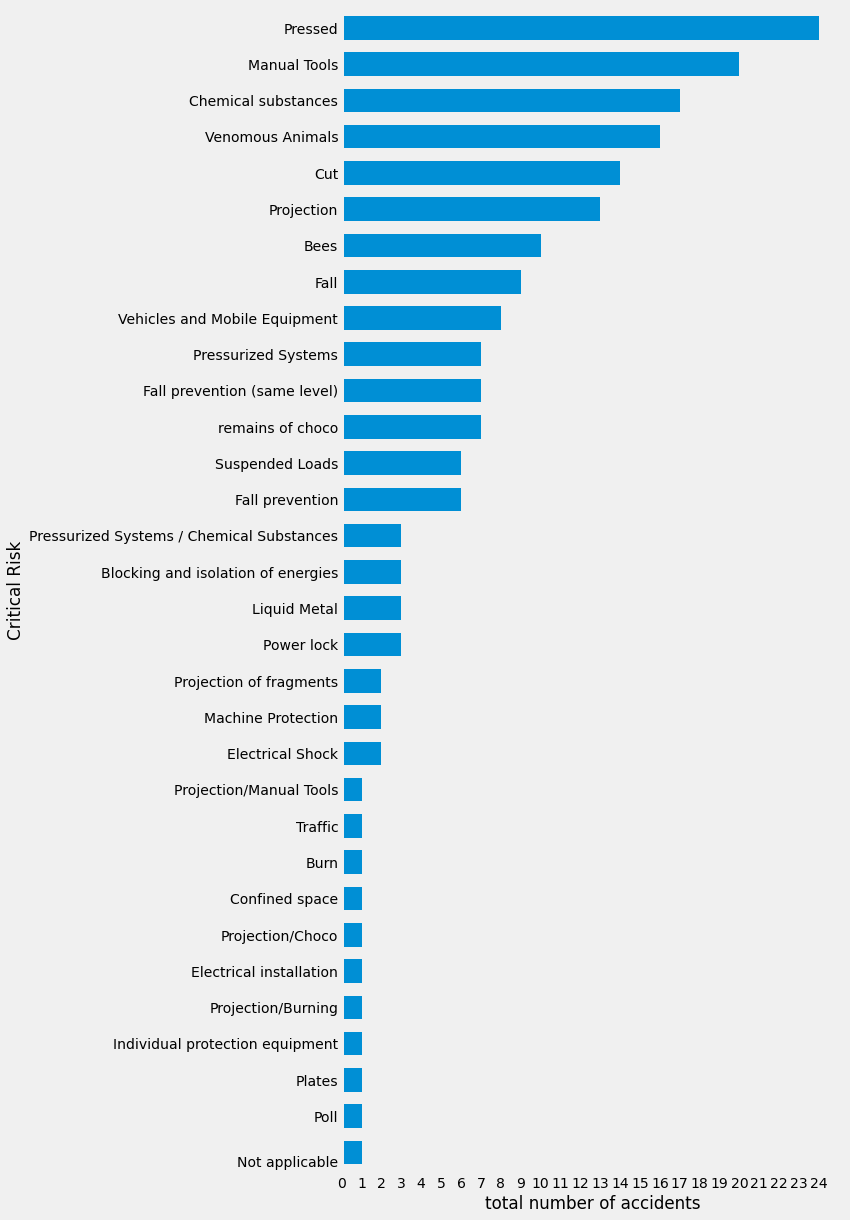

In [253]:
data_cr.total.sort_values().plot(kind='barh', figsize=(8,20), xticks=range(0,25), grid=False, width=0.65)
plt.xlabel('total number of accidents')

In [254]:
data_cr.nlargest(6, 'total').style.background_gradient(cmap='winter')

Accident Level,0,1,3,4,5,total
Critical Risk,,,,,,
Pressed,17.000000,1.000000,2.000000,4.000000,0.000000,24.000000
Manual Tools,12.000000,5.000000,3.000000,0.000000,0.000000,20.000000
Chemical substances,15.000000,2.000000,0.000000,0.000000,0.000000,17.000000
Venomous Animals,16.000000,0.000000,0.000000,0.000000,0.000000,16.000000
Cut,11.000000,2.000000,1.000000,0.000000,0.000000,14.000000
Projection,10.000000,2.000000,0.000000,1.000000,0.000000,13.000000


In [255]:
data_ind_risk=data.pivot_table(index='Critical Risk', columns='Industry Sector', aggfunc='count')['Accident Level']
data_ind_risk.drop('Others', axis=0, inplace=True)
data_ind_risk.replace(n, 0, inplace=True)
data_ind_risk['total']=data_ind_risk.sum(axis=1)
data_ind_risk

Industry Sector,Metals,Mining,Others,total
Critical Risk,,,,
\nNot applicable,1.0,0.0,0.0,1.0
Bees,0.0,0.0,10.0,10.0
Blocking and isolation of energies,3.0,0.0,0.0,3.0
Burn,1.0,0.0,0.0,1.0
Chemical substances,15.0,2.0,0.0,17.0
Confined space,1.0,0.0,0.0,1.0
Cut,10.0,4.0,0.0,14.0
Electrical Shock,0.0,2.0,0.0,2.0
Electrical installation,0.0,1.0,0.0,1.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

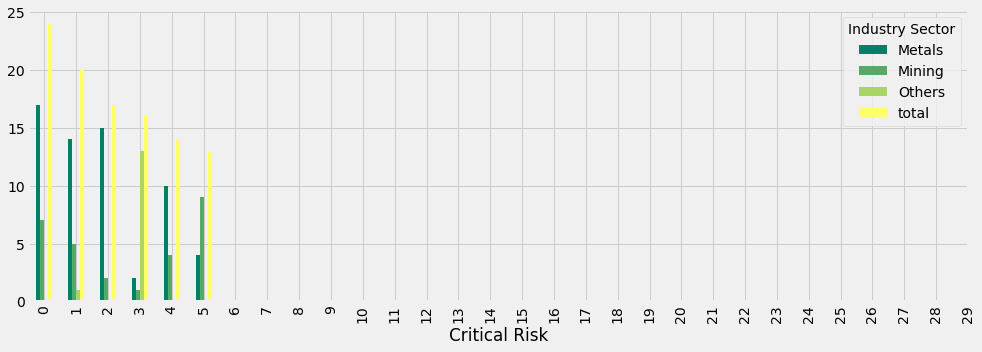

In [256]:
data_ind_risk.nlargest(6,'total').plot(kind='bar', xticks=range(30), figsize=(15,5), cmap='summer')
plt.xticks(rotation=90)

In [257]:
data_ind_risk_nt=data_ind_risk.drop('total', axis=1)

Text(30, 14, 'V')

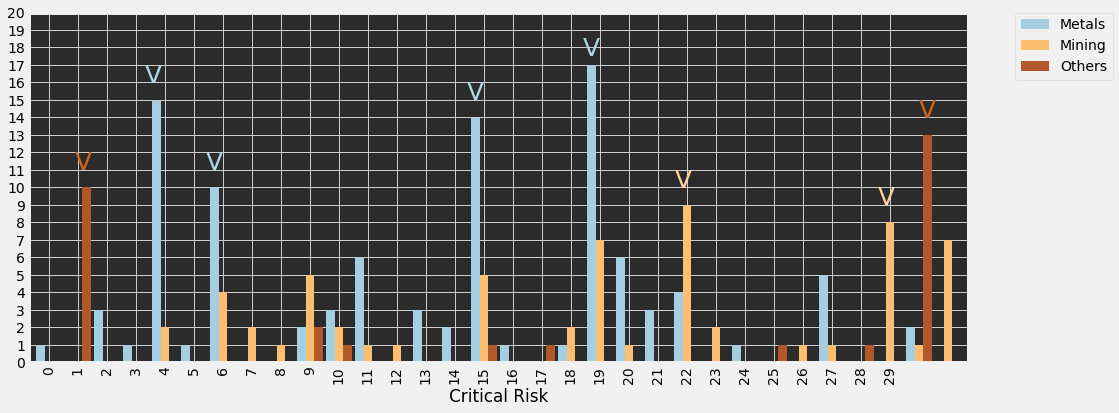

In [258]:
fig=data_ind_risk_nt.plot(kind='bar', xticks=range(30),yticks=range(0,21), figsize=(15,6), cmap='Paired', width=0.9)
fig.set_facecolor('#2B2B2B')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(x=0.9, y=11, s='V', color='#CD661D', fontsize=25)
plt.text(x=3.3, y=16, s='V', color='#ADD8E6', fontsize=25)
plt.text(x=5.4, y=11, s='V', color='#ADD8E6', fontsize=25)
plt.text(x=14.4, y=15, s='V', color='#ADD8E6', fontsize=25)
plt.text(x=18.4, y=17.5, s='V', color='#ADD8E6', fontsize=25)
plt.text(x=21.6, y=10, s='V', color='#FFD39B', fontsize=25)
plt.text(x=28.6, y=9, s='V', color='#FFD39B', fontsize=25)
plt.text(x=30, y=14, s='V', color='#CD661D', fontsize=25)

- The "Others" sector has the highest number of incidents related to bees and venomous animals.
- In Metals, chemical substances, manual tools, cuts, and pressed are the most frequent incident types.
- In Mining, projections and mobile equipement are the most frequent type of incidents.

In [259]:
data_risk_other=data.loc[data['Critical Risk']=='Others']

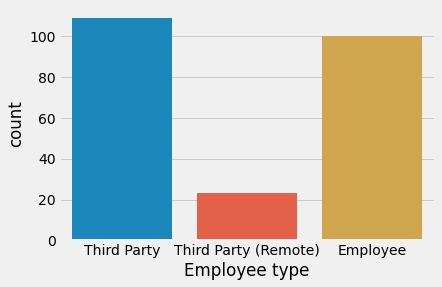

In [260]:
sns.countplot('Employee type', data=data_risk_other)

- The compostion of employee type in this group is similar to the one we had for the whole data set

In [261]:
data['Potential Accident Level'].unique()

array([4, 3, 0, 1, 5, 6])

In [262]:
order2={'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

In [263]:
len(data)

425

Multi Variate Analysis

In [264]:
def target_count(df, col1, hue):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = hue).set_title(col1.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(col1.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 90)
    return plt.show()


Analysis of Gender with Accident/ Potential Accident Level

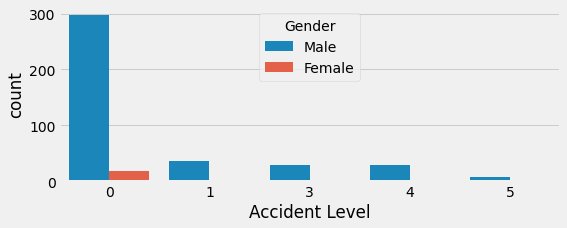

In [265]:
#target_count(data, 'Accident Level', 'Gender')
fig = plt.figure(figsize = (8, 3))
sns.countplot(x = "Accident Level", data = data, hue = 'Gender')
#sns.countplot(x="Accident Level", hue="who", data=titanic)

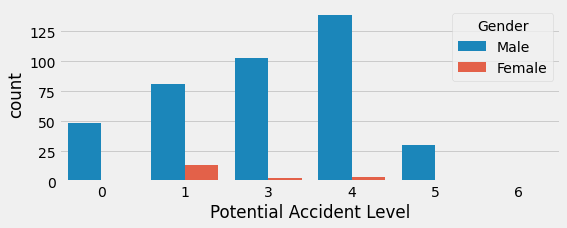

In [266]:
fig = plt.figure(figsize = (8, 3))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Gender')

Analysis of Employee type wrt Accident/ Potential Accident Level

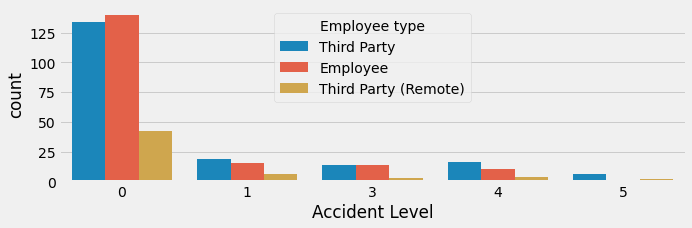

In [267]:
#target_count(data, 'Employee type')
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = data, hue = 'Employee type')

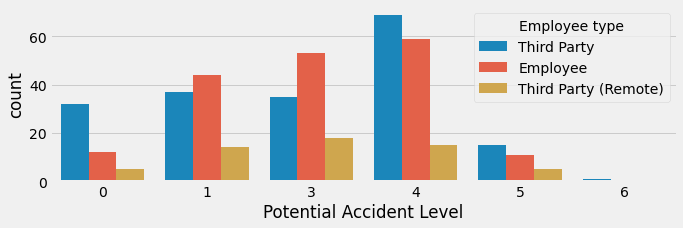

In [268]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Employee type')

Analysis of Industry Sector wrt Accident/ Potential Accident Level

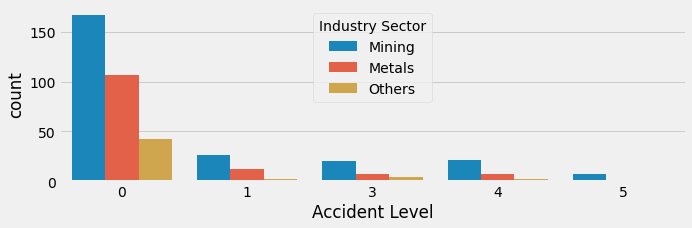

In [269]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = data, hue = 'Industry Sector')
#target_count(data, 'Industry Sector')

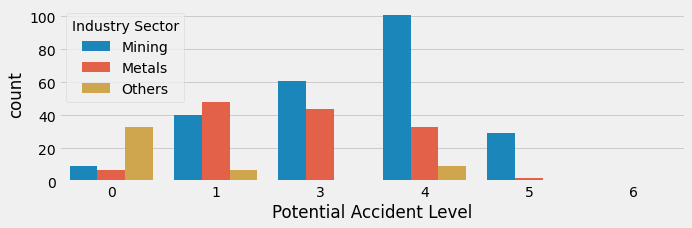

In [270]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Industry Sector')


Analysis of Country wrt Accident/ Potential Accident Level

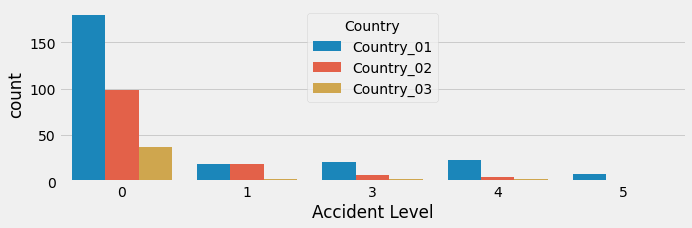

In [271]:
#target_count(data, 'Country')
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = data, hue = 'Country')

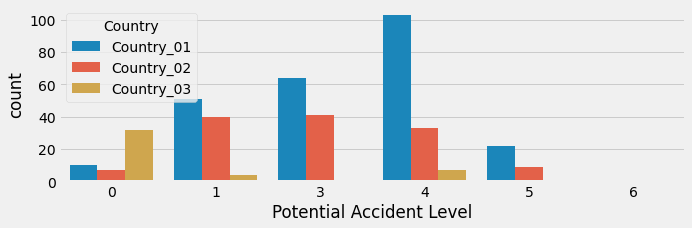

In [272]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Country')

Analysis of Month wrt Accident/ Potential Accident Level

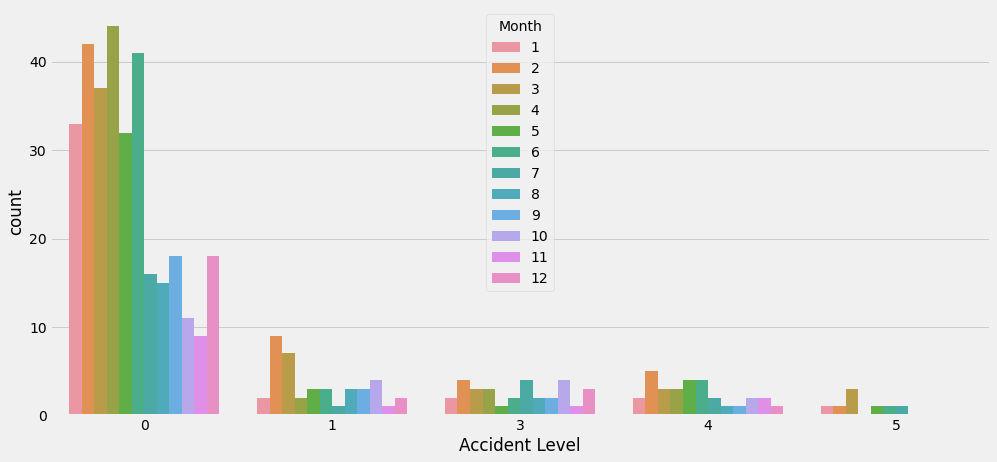

In [273]:
#target_count(data, 'Month')
fig = plt.figure(figsize = (15, 7))
sns.countplot(x = "Accident Level", data = data, hue = 'Month')

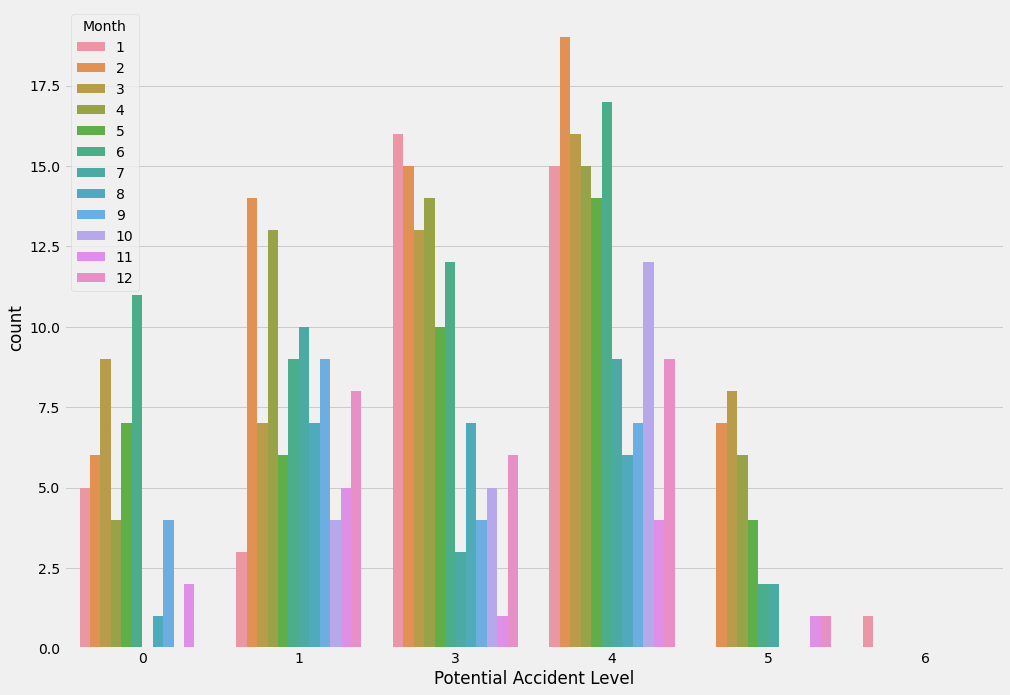

In [274]:
fig = plt.figure(figsize = (15, 11))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Month')

Analysis of Quarter wrt Accident/ Potential Accident Level

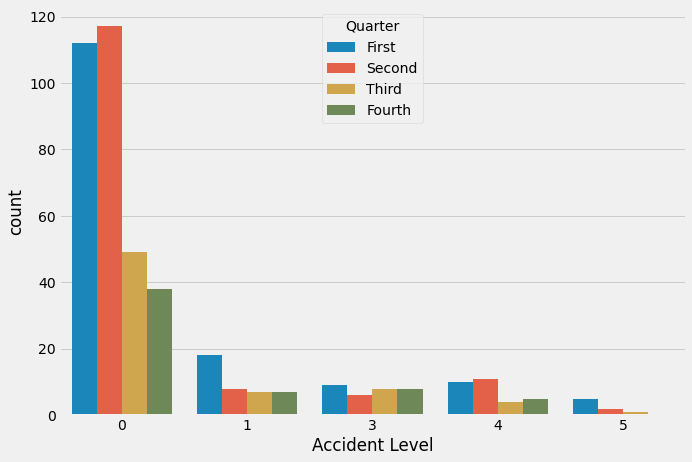

In [275]:
#target_count(data, 'Quarter')
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = data, hue = 'Quarter')

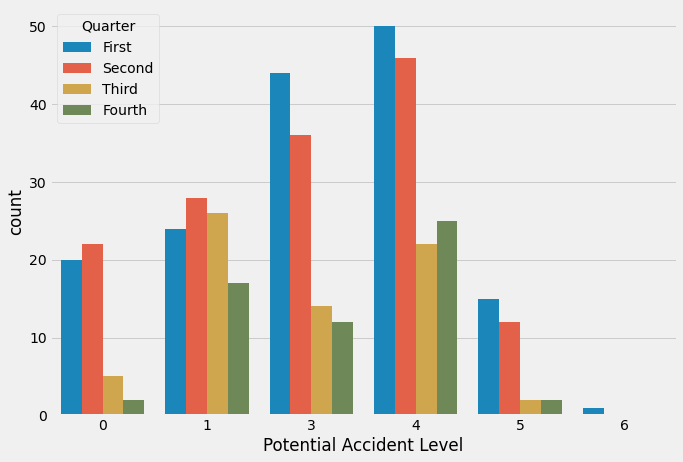

In [276]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Quarter')

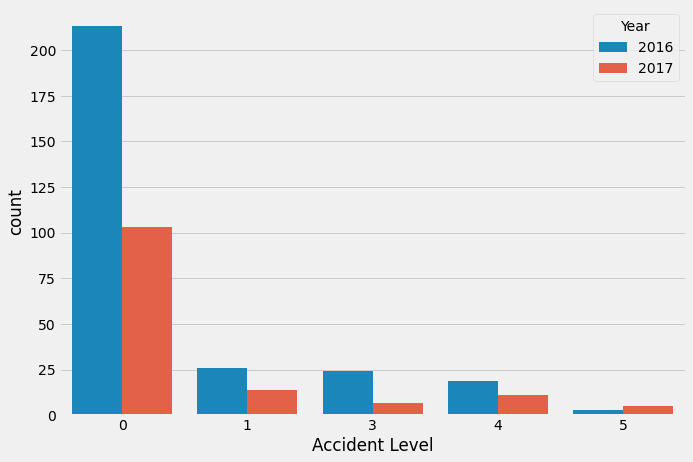

In [277]:
#target_count(data, 'Year')
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = data, hue = 'Year')

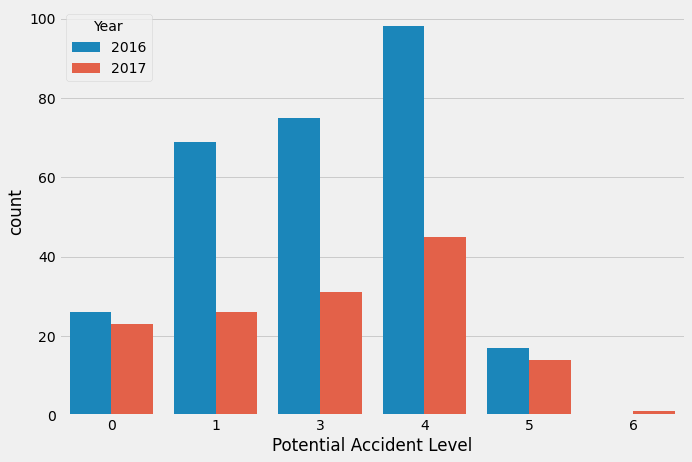

In [278]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Year')

Analysis of Weekday wrt Accident/ Potential Accident Level

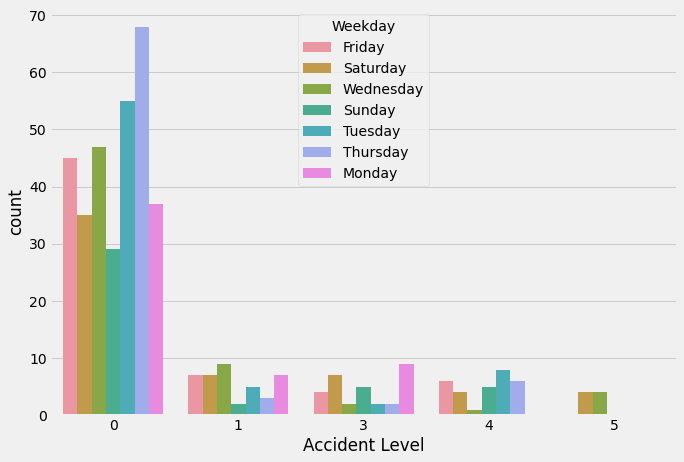

In [279]:
#target_count(data, 'Weekday')
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = data, hue = 'Weekday')

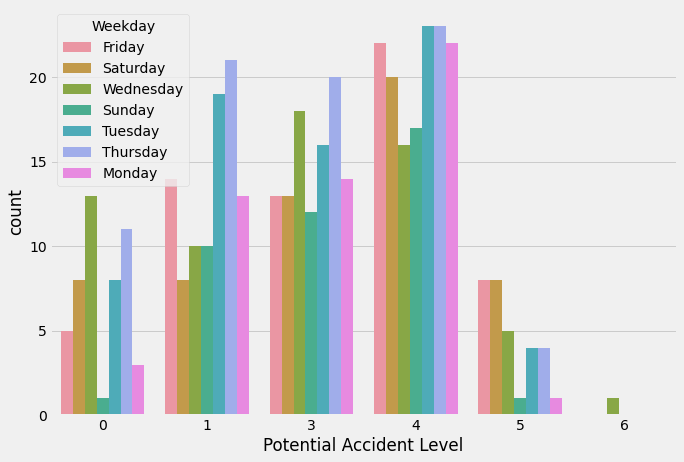

In [280]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Weekday')

Analyze Country and Employee Type

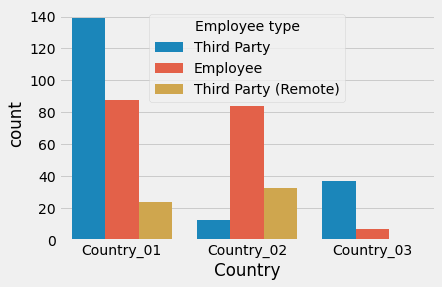

In [281]:
sns.countplot(x="Country", data=data, hue="Employee type")

Analyze Country and Industry Sector

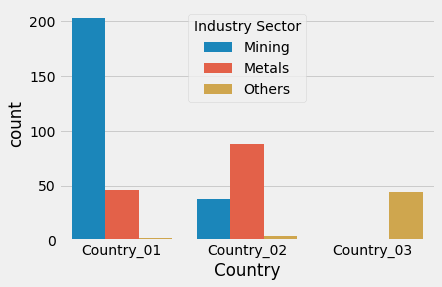

In [282]:
sns.countplot(x="Country", data=data, hue="Industry Sector")

Analyze Country and Gender

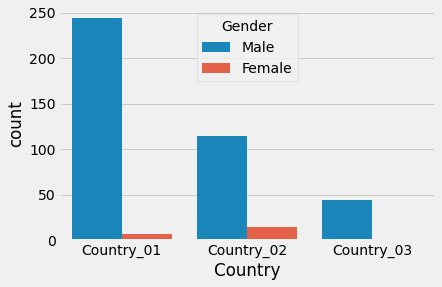

In [283]:
sns.countplot(x="Country", data=data,hue="Gender")

Analyze Employee Type and Gender

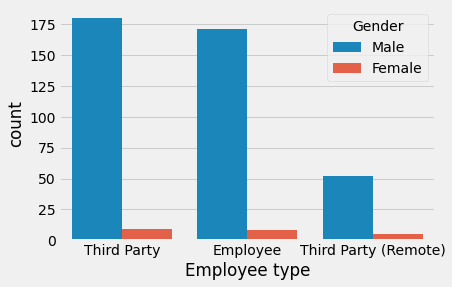

In [284]:
sns.countplot(x="Employee type", data=data,hue="Gender")

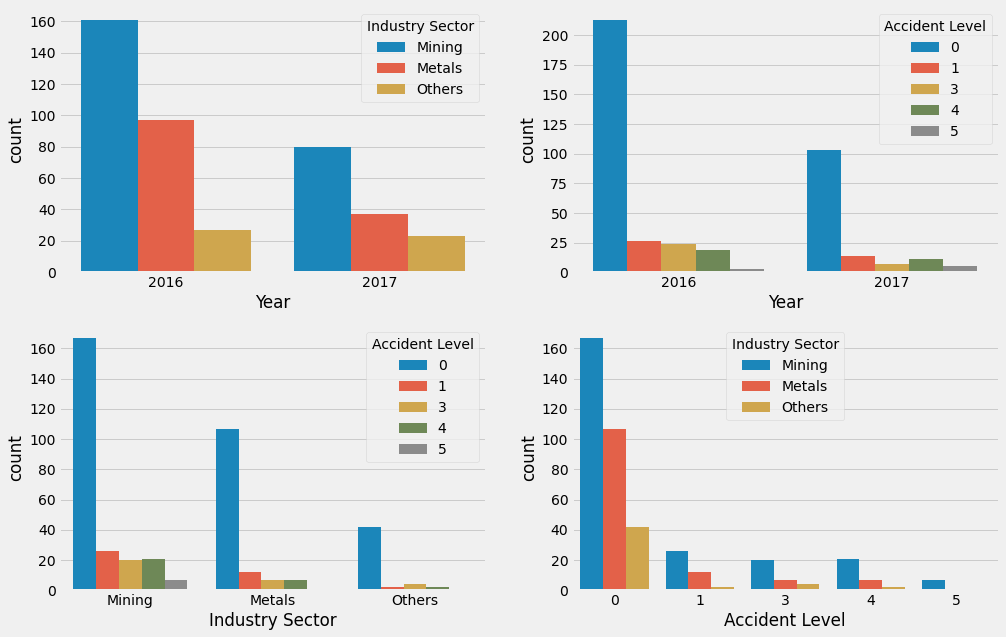

In [285]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=data['Year'],hue='Industry Sector',data=data,ax=axs[0][0])
sns.countplot(x=data['Year'],hue='Accident Level',data=data,ax=axs[0][1])
sns.countplot(x=data['Industry Sector'],hue='Accident Level',data=data,ax=axs[1][0])
sns.countplot(x=data['Accident Level'],hue='Industry Sector',data=data,ax=axs[1][1])

Analyzing text statistics

Number of characters present in each sentence

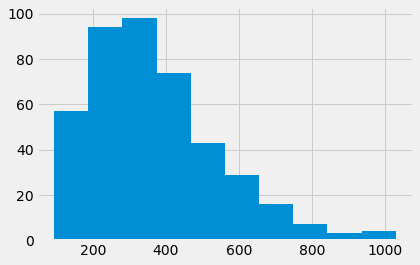

In [286]:
data['Description'].str.len().hist()

Number of words appearing in each description

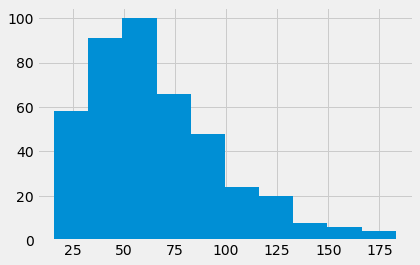

In [287]:
data['Description'].str.split().map(lambda x: len(x)).hist()

Average word length

In [288]:
data['Description']

0      While removing the drill rod of the Jumbo 08 f...
1      During the activation of a sodium sulphide pum...
2      In the sub-station MILPO located at level +170...
3      Being 9:45 am. approximately in the Nv. 1880 C...
4      Approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    Being approximately 5:00 a.m. approximately, w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At 10:00 a.m., when the assistant cleaned the ...
Name: Description, Length: 425, dtype: object

In [289]:
result = data['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

In [290]:
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Mean 4.66 words (0.326967)


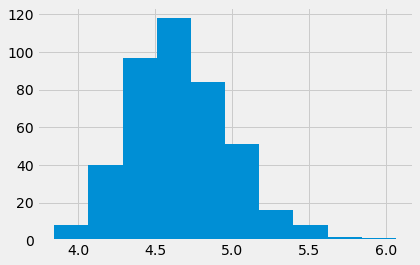

In [291]:
data['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [292]:
# Import packages
import nltk; nltk.download('wordnet'); nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [293]:
appos = {"ain't": "am not", "aren't": "are not", "can't": "cannot", 
         "can't've": "cannot have", "'cause": "because", 
         "could've": "could have", "couldn't": "could not", 
         "couldn't've": "could not have", "didn't": "did not", 
         "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
         "hadn't've": "had not have", "hasn't": "has not", 
         "haven't": "have not", "he'd": "he would", "he'd've": "he would have", 
         "he'll": "he will", "he'll've": "he will have", 
         "he's": "he is", "how'd": "how did", 
         "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
         "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
         "I'll've": "I will have", "I'm": "I am", "I've": "I have", 
         "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
         "it'll": "it will", "it'll've": "it will have", "it's": "it is", 
         "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
         "might've": "might have", "mightn't": "might not", 
         "mightn't've": "might not have", "must've": "must have", 
         "mustn't": "must not", "mustn't've": "must not have", 
         "needn't": "need not", "needn't've": "need not have",
         "o'clock": "of the clock", "oughtn't": "ought not", 
         "oughtn't've": "ought not have", "shan't": "shall not", 
         "sha'n't": "shall not", "shan't've": "shall not have", 
         "she'd": "she would", "she'd've": "she would have", 
         "she'll": "she will", "she'll've": "she will have",
         "she's": "she is", "should've": "should have", 
         "shouldn't": "should not", "shouldn't've": "should not have", 
         "so've": "so have", "so's": "so is", 
         "that'd": "that had", "that'd've": "that would have", 
         "that's": "that that is", "there'd": "there would", 
         "there'd've": "there would have", "there's": "there is", 
         "they'd": "they would", "they'd've": "they would have", 
         "they'll": "they will", "they'll've": "they will have", 
         "they're": "they are", "they've": "they have", 
         "to've": "to have", "wasn't": "was not", "we'd": "we would", 
         "we'd've": "we would have", "we'll": "we will", 
         "we'll've": "we will have", "we're": "we are", 
         "we've": "we have", "weren't": "were not", 
         "what'll": "what will", "what'll've": "what will have", 
         "what're": "what are", "what's": "what is", 
         "what've": "what have", "when's": "when is", 
         "when've": "when have", "where'd": "where did", 
         "where's": "where is", "where've": "where have", 
         "who'll": "who will", "who'll've": "who will have", 
         "who's": "who is", "who've": "who have", 
         "why's": "why is", "why've": "why have", "will've": "will have", 
         "won't": "will not", "won't've": "will not have",
         "would've": "would have", "wouldn't": "would not", 
         "wouldn't've": "would not have", "y'all": "you all", 
         "y'all'd": "you all would", "y'all'd've": "you all would have", 
         "y'all're": "you all are", "y'all've": "you all have", 
         "you'd": "you would", "you'd've": "you would have",
         "you'll": "you will", "you'll've": "you will have", 
         "you're": "you are", "you've": "you have"}

In [294]:
# Helper function to replace appos
def replace_words(headline):
    cleaned_headlines = []
    for word in str(headline).split():
        if word.lower() in appos.keys():
            cleaned_headlines.append(appos[word.lower()])
        else:
            cleaned_headlines.append(word)
    return ' '.join(cleaned_headlines)

# Function to remove punctuations
# Reference: https://www.programiz.com/python-programming/methods/string/translate
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' #string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


#Function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ''.join([lemmatizer.lemmatize(word) for word in text])


# Function to remove stopwords
stoplist = set(stopwords.words('english'))
stoplist.remove('not')
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stoplist])


# Function for wordcloud
# Reference: https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(text, mask = None, max_words = 500, max_font_size = 40, 
                   figure_size = (12, 6), title = None, title_size = 15):
    wordcloud = WordCloud(background_color = 'white', max_words = max_words,
                          random_state = 42, width = 350, height = 150, 
                          mask = mask, stopwords = stoplist, collocations = False)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    plt.imshow(wordcloud, interpolation = 'bilinear');
    plt.title(title, fontdict = {'size': title_size, 'color': 'black', 
                               'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

# Second helper function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))




In [295]:
#data = data_bkup.copy()
data['Description']

0      While removing the drill rod of the Jumbo 08 f...
1      During the activation of a sodium sulphide pum...
2      In the sub-station MILPO located at level +170...
3      Being 9:45 am. approximately in the Nv. 1880 C...
4      Approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    Being approximately 5:00 a.m. approximately, w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At 10:00 a.m., when the assistant cleaned the ...
Name: Description, Length: 425, dtype: object

In [296]:
data_bkup = data.copy()

**Converting to lower case, avoid any capital cases**

In [297]:
#Converting to lower case, avoid any capital cases

print('--'*30); print('Converting headlines to lower case')
data['cleaned_Description'] = data['Description'].apply(lambda x : x.lower())

#Replacing apostrophes to the standard lexicons

print('Replacing apostrophes to the standard lexicons')
data['cleaned_Description'] = data['cleaned_Description'].apply(lambda x : replace_words(x))


#Applying Lemmatizer
print('Applying Lemmatizer')
data['cleaned_Description'] = data['cleaned_Description'].apply(lambda x: lem(x))

#Removing multiple spaces between words

import re

print('Removing multiple spaces between words')
data['cleaned_Description'] = data['cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))

#Removing stopwords

print('Removing stopwords')
data['cleaned_Description'] = data['cleaned_Description'].apply(lambda x: remove_stopwords(x))
print('--'*30)

------------------------------------------------------------
Converting headlines to lower case
Replacing apostrophes to the standard lexicons
Applying Lemmatizer
Removing multiple spaces between words
Removing stopwords
------------------------------------------------------------


In [298]:
print('--'*40); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 7 to 241.'); print('--'*40)
# Get length of each line
data['line_length'] = data['cleaned_Description'].str.len()

print('Minimum line length: {}'.format(data['line_length'].min()))
print('Maximum line length: {}'.format(data['line_length'].max()))
print('Line with maximum length: {}'.format(data[data['line_length'] == data['line_length'].max()]['cleaned_Description'].values[0]))

--------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 7 to 241.
--------------------------------------------------------------------------------
Minimum line length: 67
Maximum line length: 706
Line with maximum length: level 3490 gallery 239, holding activity bolter equipment no. 24, operator performs drilling first hole support right gable; 7-foot-deep drill wa end, drill rod breaks, leaving thread inside drilling machine's shank; operator assistant decide make two empty percussion attempt free thread shank without success; third attempt assistant enters 3/8 "corrugated iron central hole rest bar embedded shank generate pressure, moment operator activates percussion generates movement shank hit palm victim's left hand generating described injury. worker wa wearing safety glove time accident. end corrugated iron contact left hand shaped like cane

In [299]:
print('--'*40); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 2 to 39.'); print('--'*40)
# Get length of each line
data['nb_words'] = data['cleaned_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['nb_words'].min()))
print('Maximum number of words: {}'.format(data['nb_words'].max()))
print('Line with maximum number of words: {}'.format(data[data['nb_words'] == data['nb_words'].max()]['cleaned_Description'].values[0]))

--------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 2 to 39.
--------------------------------------------------------------------------------
Minimum number of words: 10
Maximum number of words: 106
Line with maximum number of words: performing sleeve removal maneuver, hole wa 600 meter deep, general da silva pressed one side locking nut rods, together jack, hold entire weight rod maneuver. locking procedure wa not effective, weight rod wa secured steel wire rope probe winch. moment driller pedro released brake winch, inefficacy locking done one side chestnut without aid monkey, caused sliding rods. auxiliary wa prepared manual unlocking rods, holding faucet key firmly probe tower composition shifted. stem slid, hand shifted downward, causing left hand strike base probe tower structure, causing cut 4th 5th quirodactyl. employee wa take

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [309]:
max_features = 10000
maxlen = data['nb_words'].max()
#maxlen = 25 #as given in the project
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence

In [301]:
# Models
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D,GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant

from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

In [302]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(data['cleaned_Description']))

### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

**Define X and y for your model.**

In [303]:
X = tokenizer.texts_to_sequences(data['cleaned_Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['Accident Level'])

print(f'Number of Samples: {len(X)}')
print(f'Number of Labels: {len(y)}')
print(f'\nFirst headline:\n{X[4]}\n\nLabel of the first headline: {y[4]}')

Number of Samples: 425
Number of Labels: 425

First headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0   34  287  202  139   41   42
   61 1746 1747 1748 1749 1750 1751   43 1166  454   86  617   68  199
  185  732   47 1752 1753 1754  881   64  403 1755   64   93  519   48
    1  882  520 1756  185  727  140  259   31  618   33  883   53  404
   22  884    6   56   17    4   10   39]

Label of the first headline: 4


In [304]:
# Reserve padding (indexed zero)
w2i = tokenizer.word_index
print(w2i)
vocab_size = len(w2i) + 1
print(vocab_size)
print(f'Number of unique tokens: {vocab_size}')
len(w2i)

{'wa': 1, 'hand': 2, 'employee': 3, 'causing': 4, 'left': 5, 'right': 6, 'operator': 7, 'time': 8, 'activity': 9, 'injury': 10, 'moment': 11, 'area': 12, 'one': 13, 'work': 14, 'equipment': 15, 'collaborator': 16, 'worker': 17, 'finger': 18, 'accident': 19, 'pipe': 20, 'level': 21, 'hit': 22, 'assistant': 23, 'floor': 24, 'support': 25, 'mesh': 26, 'rock': 27, '2': 28, 'not': 29, 'mr': 30, 'fall': 31, 'safety': 32, '1': 33, 'approximately': 34, 'height': 35, 'part': 36, 'side': 37, 'team': 38, 'described': 39, 'cut': 40, 'm': 41, 'circumstance': 42, 'injured': 43, 'face': 44, 'metal': 45, 'used': 46, 'pump': 47, 'kg': 48, 'truck': 49, '5': 50, 'place': 51, 'towards': 52, 'meter': 53, 'medical': 54, 'performing': 55, 'foot': 56, 'two': 57, 'using': 58, '4': 59, '3': 60, 'mechanic': 61, 'point': 62, 'made': 63, 'cm': 64, 'remove': 65, 'end': 66, 'platform': 67, 'performed': 68, 'generating': 69, 'access': 70, 'maintenance': 71, 'x': 72, 'inside': 73, 'cleaning': 74, 'back': 75, 'drill': 

3249

In [305]:
tokenizer.word_index

{'wa': 1,
 'hand': 2,
 'employee': 3,
 'causing': 4,
 'left': 5,
 'right': 6,
 'operator': 7,
 'time': 8,
 'activity': 9,
 'injury': 10,
 'moment': 11,
 'area': 12,
 'one': 13,
 'work': 14,
 'equipment': 15,
 'collaborator': 16,
 'worker': 17,
 'finger': 18,
 'accident': 19,
 'pipe': 20,
 'level': 21,
 'hit': 22,
 'assistant': 23,
 'floor': 24,
 'support': 25,
 'mesh': 26,
 'rock': 27,
 '2': 28,
 'not': 29,
 'mr': 30,
 'fall': 31,
 'safety': 32,
 '1': 33,
 'approximately': 34,
 'height': 35,
 'part': 36,
 'side': 37,
 'team': 38,
 'described': 39,
 'cut': 40,
 'm': 41,
 'circumstance': 42,
 'injured': 43,
 'face': 44,
 'metal': 45,
 'used': 46,
 'pump': 47,
 'kg': 48,
 'truck': 49,
 '5': 50,
 'place': 51,
 'towards': 52,
 'meter': 53,
 'medical': 54,
 'performing': 55,
 'foot': 56,
 'two': 57,
 'using': 58,
 '4': 59,
 '3': 60,
 'mechanic': 61,
 'point': 62,
 'made': 63,
 'cm': 64,
 'remove': 65,
 'end': 66,
 'platform': 67,
 'performed': 68,
 'generating': 69,
 'access': 70,
 'maintena

In [306]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

3250


In [307]:
EMBEDDING_FILE = 'glove.6B.200d.txt'
#EMBEDDING_FILE ='glove.6B.50d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [310]:
# Getting the minimum number of words
num_words = min(max_features, vocab_size) + 1

embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i > max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [ ]:
#Defining Neural Network
model = Sequential()

#Embedding layer
model.add(Embedding(num_words, embedding_size, weights=[embedding_matrix], input_length = maxlen, trainable=True))

#LSTM 
model.add(Bidirectional(LSTM(units=128 , return_sequences = True, recurrent_dropout = 0.5 , dropout = 0.5)))

#GlobalMaxPool1D layer
model.add(GlobalMaxPool1D())

#Dense, dropout layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))

#Add a final dense layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
mc = ModelCheckpoint('sarcasm_detector.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5),
logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
callbacks = [es, mc, lr_r, tb]

print(model.summary())

In [311]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)

print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

------------------------------------------------------------ 
Number of rows in training dataset: 340
Number of columns in training dataset: 106
Number of unique words in training dataset: 2870
------------------------------------------------------------ 
Number of rows in test dataset: 85
Number of columns in test dataset: 106
Number of unique words in test dataset: 1341


In [312]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [313]:
batch_size = 100
epochs = 6

h = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = epochs, callbacks = callbacks)

Epoch 1/6
4/4 [==============================] - 13s 3s/step - loss: 0.6424 - accuracy: 0.1276 - val_loss: 0.6849 - val_accuracy: 0.0706

Epoch 00001: val_loss improved from 0.69232 to 0.68495, saving model to sarcasm_detector.h5
Epoch 2/6
4/4 [==============================] - 3s 703ms/step - loss: 0.6158 - accuracy: 0.1463 - val_loss: 0.6764 - val_accuracy: 0.0706

Epoch 00002: val_loss improved from 0.68495 to 0.67642, saving model to sarcasm_detector.h5
Epoch 3/6
4/4 [==============================] - 3s 724ms/step - loss: 0.4853 - accuracy: 0.1246 - val_loss: 0.6771 - val_accuracy: 0.0706

Epoch 00003: val_loss did not improve from 0.67642
Epoch 4/6
4/4 [==============================] - 3s 720ms/step - loss: 0.4691 - accuracy: 0.1316 - val_loss: 0.6620 - val_accuracy: 0.0706

Epoch 00004: val_loss improved from 0.67642 to 0.66197, saving model to sarcasm_detector.h5
Epoch 5/6
4/4 [==============================] - 3s 733ms/step - loss: 0.4203 - accuracy: 0.1264 - val_loss: 0.6237

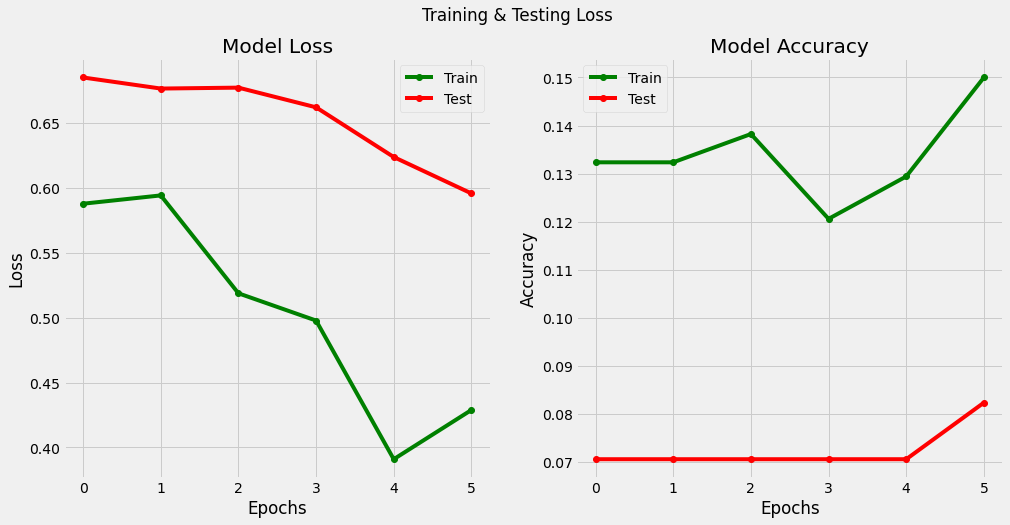

In [314]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Training & Testing Loss')

ax1.plot(h.history['loss'], 'go-' , label = 'Train')
ax1.plot(h.history['val_loss'],  'ro-' , label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(h.history['accuracy'], 'go-', label = 'Train')
ax2.plot(h.history['val_accuracy'], 'ro-' , label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")

plt.show()

In [315]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print('Overall Accuracy: {}'.format(accuracy * 100))

Overall Accuracy: 8.235294371843338


In [316]:
#Predict using model
y_pred = (model.predict(x_test) > 0.5).astype('int32')
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.01      1.00      0.03         1
           1       1.00      0.07      0.13        84
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.08        85
   macro avg       0.20      0.21      0.03        85
weighted avg       0.99      0.08      0.13        85



In [317]:
from sklearn import metrics

model_score = metrics.accuracy_score(y_test, y_pred)
print(model_score)

0.08235294117647059


In [ ]:
# save to the directory with flask app
current_dir = os.getcwd()
output_dir = re.sub('Model and data', 'Flask application', current_dir)
os.chdir(output_dir)

In [318]:
# save tokenizer for preprocessing
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [319]:
# serialize model to JSON for Flask App
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [321]:
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
print(data['Potential Accident Level'][8])

In [ ]:
data.head()

In [ ]:
toxic_comments_labels = toxic_comments[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
toxic_comments_labels.head()

In [ ]:
print('Word Cloud of Sarcastic and Non-sarcastic Headlines')
data['Description'] = data['Description'].fillna('')
sarcastic_headlines = ' '.join(data.loc[data['is_sarcastic'] == 1, 'Description'])
plot_wordcloud(sarcastic_headlines, title = 'Word Cloud of Sarcastic Headlines')

non_sarcastic_headlines = ' '.join(data.loc[data['is_sarcastic'] == 0, 'Description'])
plot_wordcloud(non_sarcastic_headlines, title = 'Word Cloud of Isn\'t Sarcastic Headlines')

In [ ]:
print('--'*30); print('Five point summary for number of words')
display(data['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(data['nb_words'].quantile(0.99)));print('--'*30)

In [ ]:
max_features = 10000
maxlen = data['nb_words'].max()
print(maxlen)
#maxlen = 25 #as given in the project
embedding_size = 50

In [ ]:
# Models
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D,GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant

from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(data['Description']))

In [ ]:
X = tokenizer.texts_to_sequences(data['Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print(f'Number of Samples: {len(X)}')
print(f'Number of Labels: {len(y)}')
print(f'\nFirst headline:\n{X[0]}\n\nLabel of the first headline: {y[0]}')

In [ ]:
# Reserve padding (indexed zero)
w2i = tokenizer.word_index
print(w2i)
vocab_size = len(w2i) + 1
print(vocab_size)
print(f'Number of unique tokens: {vocab_size}')
len(w2i)

In [ ]:
tokenizer.word_index

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

In [ ]:
#EMBEDDING_FILE = 'glove.6B.200d.txt'
EMBEDDING_FILE = 'glove.6B.50d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 50))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
# Getting the minimum number of words
num_words = min(max_features, vocab_size) + 1

embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i > max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

In [ ]:
#Defining Neural Network
model = Sequential()

#Embedding layer
model.add(Embedding(num_words, embedding_size, weights=[embedding_matrix], input_length = maxlen, trainable=True))

#LSTM 
model.add(Bidirectional(LSTM(units=128 , return_sequences = True, recurrent_dropout = 0.5 , dropout = 0.5)))

#GlobalMaxPool1D layer
model.add(GlobalMaxPool1D())

#Dense, dropout layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))

#Add a final dense layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
mc = ModelCheckpoint('sarcasm_detector.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5),
logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
callbacks = [es, mc, lr_r, tb]

print(model.summary())

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)

print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

Stop word analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def plot_top_stopwords_barchart(text):
    
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(data['Description'])

Top non-stopwords plot

In [ ]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(data['Description'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(data['Description'],2)

In [ ]:
plot_top_ngrams_barchart(data['Description'],3)

In [ ]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
   
plot_wordcloud(data['Description'])

##Word Embedding

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors # Gensim contains word2vec models and processing tools

#path = '/content/drive/My Drive/'
path = '/content/drive/MyDrive/AI_ML/Projects/Capstone-NLP/'

glove_file = datapath(path + 'glove.6B.50d.txt') # This is a GloVe model
tmp_file = get_tmpfile(path + 'word2vec.glove.6B.50d.txt')

from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_file, tmp_file)  # Converting the GloVe file into a Word2Vec file
model = KeyedVectors.load_word2vec_format(tmp_file)

TFIDF Feature

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem

feature_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(data['Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    feature_df = pd.concat([feature_df, tfs], axis=1)
feature_df = pd.concat([data, feature_df], axis=1)
feature_df.head(3)

Label Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


feature_df['Country'] = LabelEncoder().fit_transform(feature_df['Country']).astype(np.int8)
feature_df['Local'] = LabelEncoder().fit_transform(feature_df['Local']).astype(np.int8)
feature_df['Industry Sector'] = LabelEncoder().fit_transform(feature_df['Industry Sector']).astype(np.int8)
feature_df['Accident Level'] = LabelEncoder().fit_transform(feature_df['Accident Level']).astype(np.int8)
feature_df['Potential Accident Level'] = LabelEncoder().fit_transform(feature_df['Potential Accident Level']).astype(np.int8)
feature_df['Gender'] = LabelEncoder().fit_transform(feature_df['Gender']).astype(np.int8)
feature_df['Employee type'] = LabelEncoder().fit_transform(feature_df['Employee type']).astype(np.int8)
feature_df['Critical Risk'] = LabelEncoder().fit_transform(feature_df['Critical Risk']).astype(np.int8)
feature_df['Weekday'] = LabelEncoder().fit_transform(feature_df['Weekday']).astype(np.int8)
feature_df['Quarter'] = LabelEncoder().fit_transform(feature_df['Quarter']).astype(np.int8)
feature_df.drop(['Date','Description', 'Description'],axis=1,inplace=True)
feature_df.head(3)

In [ ]:
from keras.utils import np_utils

dummy_y = np_utils.to_categorical(feature_df['Potential Accident Level'])
dummy_y

In [ ]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
x_df

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)

In [ ]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Accident Level case

In [ ]:
import lightgbm as lgb
y_series = feature_df['Accident Level']
x_df = feature_df.drop(['Accident Level','Potential Accident Level'], axis=1) 
X_train, X_valid, Y_train, Y_valid = train_test_split(x_df, y_series, test_size=0.2, random_state=0, stratify=y_series)

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_valid, Y_valid, reference=lgb_train)

In [ ]:
params = {
    'task' : 'train',
    'boosting' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'num_leaves': 200,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 5
}
gbm_ac = lgb.train(params,
            lgb_train,
            num_boost_round=100,
            valid_sets=lgb_valid,
            early_stopping_rounds=100)

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()
ac_label = ['Accident Level : 1','Accident Level : 2','Accident Level : 3','Accident Level : 4','Accident Level : 5']
explainer = shap.TreeExplainer(model=gbm_ac)
shap_values_ac = explainer.shap_values(X=X_train)
shap.summary_plot(shap_values=shap_values_ac, features=X_train, feature_names=X_train.columns, plot_type="bar", max_display=30, class_names=ac_label)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_ac[1][0,:], X_train.iloc[0,:])

In [ ]:
t = lgb.plot_tree(gbm_ac, figsize=(20, 20), precision=1, tree_index=0, show_info=['split_gain'])
plt.title('Visualization of Tree in Accident Level')
plt.show()

Potential accident case

In [ ]:
_feature_df = feature_df[~feature_df['Potential Accident Level'].isin([5])]
y_series = _feature_df['Potential Accident Level']
x_df = _feature_df.drop(['Accident Level','Potential Accident Level'], axis=1) 
X_train, X_valid, Y_train, Y_valid = train_test_split(x_df, y_series, test_size=0.2, random_state=0, stratify=y_series)

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_valid, Y_valid, reference=lgb_train)

In [ ]:
params = {
    'task' : 'train',
    'boosting' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'num_leaves': 200,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 5
}
gbm_pac = lgb.train(params,
            lgb_train,
            num_boost_round=100,
            valid_sets=lgb_valid,
            early_stopping_rounds=100)

In [ ]:
pac_label = ['Potential Accident Level : 1','Potential Accident Level : 2','Potential Accident Level : 3','Potential Accident Level : 4','Potential Accident Level : 5']
explainer = shap.TreeExplainer(model=gbm_pac)
shap_values_pac = explainer.shap_values(X=X_train)
shap.summary_plot(shap_values=shap_values_pac, features=X_train, feature_names=X_train.columns, plot_type="bar", max_display=30, class_names=pac_label)

In [ ]:
t = lgb.plot_tree(gbm_pac, figsize=(20, 20), precision=1, tree_index=0, show_info=['split_gain'])
plt.title('Visualization of Tree in Potential Accident Level')
plt.show()

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_pac[1][0,:], X_train.iloc[0,:])